In [1]:
#Jupyter notebook
%matplotlib notebook

#import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

## Raw Data Exploration 

In [1]:
#import the data
import pandas as pd

path = ''
data = pd.read_csv('C:\\Users\\yzhang\\Desktop\\KTPAssociate\\Data\\NewData\\SELL_THROUGH_PC.csv')
#data = data.to_pickle('C:\\Users\\yzhang\\Desktop\\KTPAssociate\\Data\\NewData\\SELL_THROUGH_PC.csv')

C:\Users\yzhang\AppData\Local\Continuum\anaconda3\envs\my_prophet_env\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data.head()

,record_id,date,country,product_category,vendor_id_scramble,product_id_scramble,product_range_id_scramble,product_family_id_scramble,reseller_company_id_scramble,p_reseller_company_id_scramble,...,fingerprint_reader_306,form_factor_47,mobile_phone_type_819,operating_system_44,processor_model_25,processor_type_23,processor_vendor_381,touchscreen_713,units,revenue
0,2863140296,2016-10-01,Spain,Notebooks,683413.0,1710657.0,187806.0,699402.0,313160.0,933557.0,...,No,Clamshell,Info Not Available,Mac OS X,3210M,Core i5,Intel,No,1.0,907.760000
1,2863143824,2016-10-01,Spain,Notebooks,104209.0,6683030.0,97047.0,613081.0,524119.0,933557.0,...,No,Clamshell,Info Not Available,Windows 10 Home 64,6200U,Core i5,Intel,No,1.0,660.330000
2,2863145127,2016-10-01,Spain,Notebooks,683413.0,1710657.0,187806.0,699402.0,326785.0,933557.0,...,No,Clamshell,Info Not Available,Mac OS X,3210M,Core i5,Intel,No,2.0,1815.520000
3,2863147553,2016-10-01,Spain,Desktops,683413.0,6426769.0,6600.0,957316.0,680820.0,933557.0,...,Info Not Available,All-in-One Desktop,Info Not Available,Mac OS X,5575R,Core i5,Intel,No,1.0,1154.500000
4,2865339849,2016-10-03,Poland,Notebooks,876750.0,8966922.0,747045.0,561097.0,962173.0,962173.0,...,No,Hybrid,Info Not Available,Windows 10 Home 32,Z3735F,Atom,Intel,Yes,1.0,278.517933


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10412402 entries, 0 to 10412401
Data columns (total 34 columns):
record_id                         int64
date                              object
country                           object
product_category                  object
vendor_id_scramble                float64
product_id_scramble               float64
product_range_id_scramble         float64
product_family_id_scramble        float64
reseller_company_id_scramble      float64
p_reseller_company_id_scramble    float64
company_id_scramble               int64
company_id_original_scramble      int64
target_channel_id                 int64
final_customer_id                 int64
flag_company                      object
flag_reseller                     object
target_segment_48                 object
number_of_cores_726               object
cd_dvd_type_36                    object
chipset_80                        object
config_type_46                    object
device_type_743        

In [9]:
#check values in each column
#print(data['country'].value_counts())
for col in data.columns:
    if len(data[col].value_counts()) < 50:
        print(data[col].value_counts())

Germany           2638387
Italy             2182183
United Kingdom    2128485
Spain             1375032
France            1253391
Poland             834924
Name: country, dtype: int64
Notebooks    7325033
Desktops     3087369
Name: product_category, dtype: int64
3     7810961
1     1173473
4      766512
2      453706
11      69652
8       49381
21      22545
5       17186
16      14763
25      11537
6       10312
9        8302
20       3338
18        582
13         95
26         57
Name: target_channel_id, dtype: int64
2     5197007
4     2020721
11    1612240
1     1314992
10     267442
Name: final_customer_id, dtype: int64
real    10370118
est        42284
Name: flag_company, dtype: int64
real    6987609
est     3424793
Name: flag_reseller, dtype: int64
Business              5260055
Consumer              4908555
Info Not Available       4711
Name: target_segment_48, dtype: int64
2                     5857848
4                     3791635
6                      371034
0               

In [6]:
#Check missing values
print('There are ' + str(len(data)) + ' transactions in the dataset')
for col in data.columns:
    if data[[col]].isnull().any().any():
        print("The number of NAN values in " + str(data[[col]].isna().sum()))
        print("The ratio of missing values is:" + str(data[[col]].isna().sum()/len(data[[col]])))

There are 10412402 transactions in the dataset
The number of NAN values in vendor_id_scramble    3400
dtype: int64
The ratio of missing values is:vendor_id_scramble    0.000327
dtype: float64
The number of NAN values in product_id_scramble    239081
dtype: int64
The ratio of missing values is:product_id_scramble    0.022961
dtype: float64
The number of NAN values in product_range_id_scramble    239081
dtype: int64
The ratio of missing values is:product_range_id_scramble    0.022961
dtype: float64
The number of NAN values in product_family_id_scramble    239081
dtype: int64
The ratio of missing values is:product_family_id_scramble    0.022961
dtype: float64
The number of NAN values in reseller_company_id_scramble    2869212
dtype: int64
The ratio of missing values is:reseller_company_id_scramble    0.275557
dtype: float64
The number of NAN values in p_reseller_company_id_scramble    3279392
dtype: int64
The ratio of missing values is:p_reseller_company_id_scramble    0.314951
dtype: flo

Things that worth investigation: 
1. Aggregate products, Product ID: country, vendor_id, product_id. on daily or weekly level. 
2. Filtering feasible product. (percentage within all feasible products, percentage of the feasible product within the total revenue, percentage of the feasible product within the total sales units, and also the percentaegs considered in each country and vendor).
3. Analysis on the filtered data. (missing values of each columns, non-existent values by weekdays in each country, sale volume by weekdays in each country, )
3. After the filtering, aggregation on a daily or weekly basis.

In [2]:
import numpy as np
test1 = data[['vendor_id_scramble', 'product_id_scramble', 'revenue']]
test1 = test1.fillna(-1)
test2 = test1[test1['product_id_scramble']== -1]

In [13]:
test1.groupby(['vendor_id_scramble', 'product_id_scramble'])['revenue'].sum()

vendor_id_scramble  product_id_scramble
-1.0                -1.0                   2.870716e+06
 10901.0             525737.0              0.000000e+00
                     1737290.0             0.000000e+00
                     3155043.0             8.900088e+04
                     4830836.0             1.206368e+05
                     5398792.0             1.490020e+03
                     8237371.0             2.671143e+04
 17759.0            -1.0                   1.897088e+04
                     3838602.0             3.057680e+04
                     5719392.0             5.938168e+04
                     9755356.0             4.568450e+04
 19433.0            -1.0                   3.799849e+05
                     2058.0                4.899693e+04
                     6465.0               -6.244800e+02
                     6877.0                7.898198e+03
                     8465.0                7.091396e+05
                     8691.0                7.755053e+03
        

In [14]:
test2.groupby(['vendor_id_scramble', 'product_id_scramble'])['revenue'].sum()

vendor_id_scramble  product_id_scramble
-1.0                -1.0                   2.870716e+06
 17759.0            -1.0                   1.897088e+04
 19433.0            -1.0                   3.799849e+05
 37600.0            -1.0                   1.546927e+02
 52621.0            -1.0                   2.395093e+02
 61463.0            -1.0                   2.450124e+05
 71942.0            -1.0                   7.740000e+02
 72374.0            -1.0                   3.269966e+03
 83431.0            -1.0                   4.874546e+05
 92364.0            -1.0                   2.247080e+03
 96041.0            -1.0                   1.639408e+03
 101968.0           -1.0                   1.556702e+04
 104209.0           -1.0                   6.830095e+07
 111902.0           -1.0                   2.079323e+03
 121826.0           -1.0                   1.277202e+06
 124806.0           -1.0                   2.559646e+03
 124900.0           -1.0                   7.072063e+01
 136067.

In [80]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10412402 entries, 0 to 10412401
Data columns (total 3 columns):
vendor_id_scramble     float64
product_id_scramble    float64
revenue                float64
dtypes: float64(3)
memory usage: 238.3 MB


In [81]:

test1[test1['vendor_id_scramble'] ==  52621]

,vendor_id_scramble,product_id_scramble,revenue
766408,52621.0,9298271.0,335.870000
1061573,52621.0,9847240.0,-884.715548
1376478,52621.0,4985444.0,360.000000
2235538,52621.0,-1.0,96.419307
4378551,52621.0,-1.0,143.090000


In [3]:
f = {'revenue':['sum']}
summary1 = test1.groupby(['vendor_id_scramble']).agg(f)
summary2 = test2.groupby(['vendor_id_scramble']).agg(f)

In [4]:
summary = summary2.merge(summary1, left_on = 'vendor_id_scramble', right_on = 'vendor_id_scramble')
summary.columns = ['revenue_miss_product', 'total_revenue']
summary['miss_ratio'] = summary['revenue_miss_product']/summary['total_revenue']

In [6]:
summary = summary.loc[(summary['miss_ratio'] >= 0) & (summary['miss_ratio'] <= 1)]

In [7]:
summary.sort_values(by = 'miss_ratio', ascending = False)

,revenue_miss_product,total_revenue,miss_ratio
vendor_id_scramble,,,
-1.0,2.870716e+06,2.870716e+06,1.000000
489936.0,4.141400e+02,4.141400e+02,1.000000
277124.0,6.245420e+02,6.245420e+02,1.000000
278152.0,4.429010e+03,4.429010e+03,1.000000
800015.0,2.076923e+04,2.076923e+04,1.000000
791532.0,-6.537800e+02,-6.537800e+02,1.000000
777000.0,2.011765e+03,2.011765e+03,1.000000
305028.0,1.255391e+05,1.255391e+05,1.000000
312894.0,2.095064e+03,2.095064e+03,1.000000


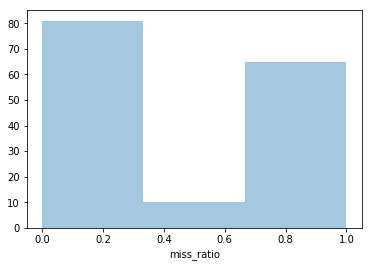

In [9]:
import seaborn as sns
sns.distplot(summary['miss_ratio'], kde = False)

In [12]:
test1[test1['product_id_scramble'] ==  -1].revenue.sum()/test1.revenue.sum()

0.01669188628780036

The products without product id and its associated values consititute 1.6% of the total revenue and 0.8% of the total 